In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Augmentation

In [57]:
image_size=150

In [58]:
def data_generators(train_dataset,validation_dataset):
    train_data_gen=ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
    training_data=train_data_gen.flow_from_directory(directory=train_dataset,class_mode='categorical',batch_size=50,target_size=(image_size,image_size))
    validation_data_gen=ImageDataGenerator(rescale=1.0/255.0)
    validation_data=validation_data_gen.flow_from_directory(directory=validation_dataset,class_mode='categorical',batch_size=50,target_size=(image_size,image_size))

    return training_data,validation_data    

In [59]:
train_dataset='C:\\Users\\rifda\\anaconda3\\envs\\ml_env\\skin-disease-datasaet\\train_set'
vaidation_dataset='C:\\Users\\rifda\\anaconda3\\envs\\ml_env\\skin-disease-datasaet\\test_set'
training_data,validation_data=data_generators(train_dataset,vaidation_dataset)

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


# Ambil  labels classification

In [60]:
inference_labels=os.listdir('C:\\Users\\rifda\\anaconda3\\envs\\ml_env\\skin-disease-datasaet\\train_set')
class_count=len(inference_labels)

# panggil fungsi Callbacks

In [61]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''

    '''
    
    if(logs.get('loss') < 0.1):
     
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True
                
    
# Instantiate class
callbacks = myCallback()

# Model Arsitektur

In [62]:
def create_model():
    model=Sequential([
            Conv2D(256,(3,3),activation='relu',input_shape=(image_size,image_size,3)),
            MaxPooling2D(2,2),
            Conv2D(128,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Conv2D(32,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(1024,activation='relu'),
            Dropout(0.4),
            Dense(512,activation='relu'),
            Dropout(0.4),
            Dense(class_count,activation='softmax')
        ])
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['Accuracy'])
    
    return model

# Training model

In [63]:
model=create_model()
history=model.fit(training_data,epochs=70,verbose=1,validation_data=validation_data,callbacks=[callbacks])

Epoch 1/70
19/19 [==============================] - 103s 5s/step - loss: 2.0821 - Accuracy: 0.1288 - val_loss: 2.0657 - val_Accuracy: 0.1459
Epoch 2/70
19/19 [==============================] - 85s 4s/step - loss: 2.0564 - Accuracy: 0.1439 - val_loss: 2.0180 - val_Accuracy: 0.1416
Epoch 3/70
19/19 [==============================] - 95s 5s/step - loss: 2.0280 - Accuracy: 0.1656 - val_loss: 2.0411 - val_Accuracy: 0.1416
Epoch 4/70
19/19 [==============================] - 115s 6s/step - loss: 2.0066 - Accuracy: 0.1883 - val_loss: 1.9705 - val_Accuracy: 0.3176
Epoch 5/70
19/19 [==============================] - 120s 6s/step - loss: 1.9905 - Accuracy: 0.2186 - val_loss: 1.9154 - val_Accuracy: 0.2876
Epoch 6/70
19/19 [==============================] - 117s 6s/step - loss: 1.9402 - Accuracy: 0.2273 - val_loss: 1.9440 - val_Accuracy: 0.2403
Epoch 7/70
19/19 [==============================] - 111s 6s/step - loss: 1.9373 - Accuracy: 0.2413 - val_loss: 1.8949 - val_Accuracy: 0.3004
Epoch 8/70
19/1

In [64]:
loss, accuracy = model.evaluate(validation_data)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 10s 2s/step - loss: 0.7901 - Accuracy: 0.7639
Validation Accuracy: 76.39%


# Cek Akurasi

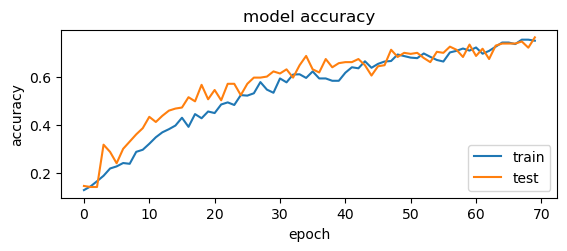

In [65]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['Accuracy'])
plot.plot(history.history['val_Accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

# Plot the loss

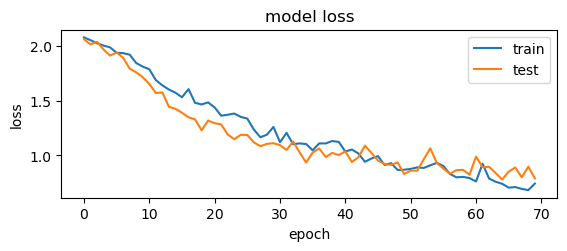

In [66]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

# Model Predictions

1/1 [==============================] - 0s 400ms/step
[[3.0194460e-03 7.4777671e-04 9.7989261e-01 9.7004790e-03 4.9234230e-05
  1.4300951e-03 5.1405341e-03 1.9762732e-05]]


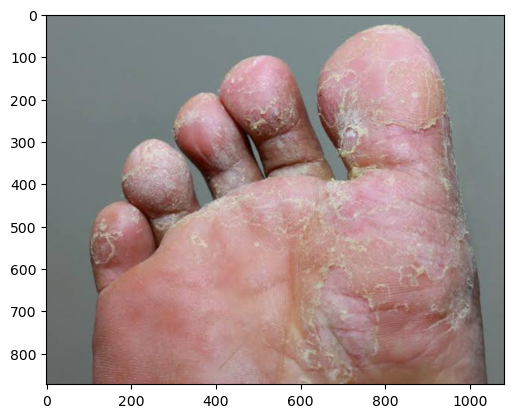

Inference is FU-athlete-foot


In [67]:
image_path=r"C:\Users\rifda\anaconda3\envs\ml_env\sikil.jpg"
image = load_img(image_path, target_size=(image_size, image_size))
x=img_to_array(image)
x /= 255.0
x=np.expand_dims(x, axis=0)
classes = model.predict(x)
print(classes)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()
category=np.array(classes[0]).argmax()
print("Inference is " + inference_labels[category])

In [69]:
print(tf.__version__)

2.15.1


In [70]:
model.save('model_bbb.h5')


c:\Users\rifda\anaconda3\envs\ml_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
